# Q1-Delivery_time 
**Predict delivery time using sorting time 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [27]:
Dt_St = pd.read_csv('delivery_time.csv')
Dt_St.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA and Data Visualization

In [28]:
Dt_St.shape

(21, 2)

In [29]:
Dt_St.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

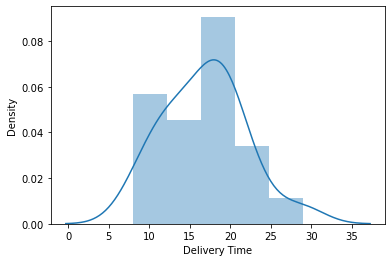

In [30]:
sns.distplot(Dt_St['Delivery Time'])

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

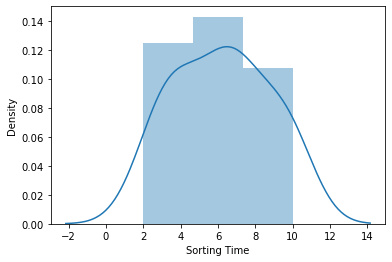

In [31]:
sns.distplot(Dt_St['Sorting Time'])

# Feature Engineering

In [33]:
# Renaming Columns
Dt_St = Dt_St.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
Dt_St

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [35]:
Dt_St.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

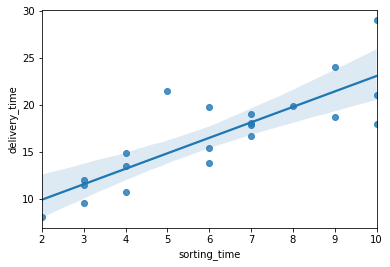

In [36]:
sns.regplot(x = Dt_St['sorting_time'], y = Dt_St['delivery_time'])

# Model Building

In [37]:
model = smf.ols("delivery_time~sorting_time",data = Dt_St).fit()

# Model Building

In [38]:
# Finding Coefficient parameters
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [40]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [41]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time

14.827834

In [42]:
# Automatic Prediction for say sorting time 5, 8
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [44]:
data_pred = pd.DataFrame(new_data,columns = ['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [45]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# ----------------------------------------------------------------------------------------------------------

# Q2-Salary_hike
**Build a prediction model for Salary_hike

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
Data_f = pd.read_csv('Salary_Data.csv')
Data_f.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Data Exploration

In [53]:
Data_f.shape

(30, 2)

In [54]:
Data_f.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [55]:
Data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [115]:
x = Data_f.iloc[:, 0:2]
x

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [116]:
y = Data_f.iloc[:, 0:2]
y

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [117]:
# Step 1 - Load Data
import pandas as pd
Data_f= pd.read_csv('Salary_Data.csv')
x = Data_f.iloc[:, 0:2]
y = Data_f.iloc[:, 1]

In [118]:
# Step 2 - Fitting Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()